In [2]:
#Pandas kütüphanesini ekleyelim
import pandas as pd

In [4]:
df=pd.read_csv("rus-personel.csv")

In [3]:
#İlk birkaç satırı görelim
print(df.head())

         date  day  personnel personnel*  POW
0  2024-10-13  963     668930      about  NaN
1  2024-10-12  962     667630      about  NaN
2  2024-10-11  961     666340      about  NaN
3  2024-10-10  960     665200      about  NaN
4  2024-10-09  959     664120      about  NaN


In [4]:
#Verinin boyunu inceleyelim
print(df.shape)

(962, 5)


In [5]:
print(df.dtypes)
print(df.columns)

date           object
day             int64
personnel       int64
personnel*     object
POW           float64
dtype: object
Index(['date', 'day', 'personnel', 'personnel*', 'POW'], dtype='object')


In [6]:
#Eksik verilerin kontrolü
print(df.isnull().sum())

date            0
day             0
personnel       0
personnel*      0
POW           900
dtype: int64


In [7]:
#Eksik verileri ortalamayla doldurma
df["POW"]=df["POW"].fillna(df["POW"].mean())
print(df.head())

         date  day  personnel personnel*         POW
0  2024-10-13  963     668930      about  386.387097
1  2024-10-12  962     667630      about  386.387097
2  2024-10-11  961     666340      about  386.387097
3  2024-10-10  960     665200      about  386.387097
4  2024-10-09  959     664120      about  386.387097


In [8]:
#İstatiksel özet çıkaralim
print(df.describe())

             day      personnel         POW
count  962.00000     962.000000  962.000000
mean   482.50000  251879.069647  386.387097
std    277.84978  192688.100207   33.115550
min      2.00000    2800.000000    0.000000
25%    242.25000   67587.500000  386.387097
50%    482.50000  221730.000000  386.387097
75%    722.75000  399997.500000  386.387097
max    963.00000  668930.000000  496.000000


Yukarıdaki istatiksel özete baktığımız zaman totalde her alanda 962 değerimiz var.Mean bize sayısal değerlerin ortalamasını verir örneğin personel kaybı ortalama 251 göstermektedir.Std sütunu bize verilerin ortalamaya göre dağılımını verir 192 ile personele bakılınca dağılımda ciddi farklılıklar söz konusu.

Personel Bazlı Kayıp Özeti:
Ortalama 251,789 göstermektedir ancak standart sapmamız bize günlük ölümlerde ciddi bir dalgalanma olduğunu göstermektedir kayıplar günden güne çok çeşitlilik gösteriyor olup bazı günlerde ciddi kayıp olduğunu bizlere anlatmaktadır.

"pow" Savaş Esirleri Özeti:
Kayıp değerlerimizi ortalama bir değerle doldurup veride basit bir manipülasyon yaptık.Ortalama esir kaybı 386 göstermektedir Standart sapma ise 33 gösteriyor olup esir kayıplarında da dalgalanma yüksektedir.Minimum 0 Maksimum 496 bu bazı günlerde esir olmadığını bize özetle gösterir.

In [10]:
#Belirli sütunları alalım örnğin.
df[['date','personnel']].head()

,date,personnel
0,2024-10-13,668930
1,2024-10-12,667630
2,2024-10-11,666340
3,2024-10-10,665200
4,2024-10-09,664120


In [12]:
df_sorted=df.sort_values(by="date")
print(df_sorted)

           date  day  personnel personnel*         POW
961  2022-02-25    2       2800      about    0.000000
960  2022-02-26    3       4300      about    0.000000
959  2022-02-27    4       4500      about    0.000000
958  2022-02-28    5       5300      about    0.000000
957  2022-03-01    6       5710      about  200.000000
..          ...  ...        ...        ...         ...
4    2024-10-09  959     664120      about  386.387097
3    2024-10-10  960     665200      about  386.387097
2    2024-10-11  961     666340      about  386.387097
1    2024-10-12  962     667630      about  386.387097
0    2024-10-13  963     668930      about  386.387097

[962 rows x 5 columns]


In [19]:
#Hangi tarihte en çok personel kaybı var bakalım
df_personel=df.sort_values(by='personnel',ascending=False)
print(df_personel)

           date  day  personnel personnel*         POW
0    2024-10-13  963     668930      about  386.387097
1    2024-10-12  962     667630      about  386.387097
2    2024-10-11  961     666340      about  386.387097
3    2024-10-10  960     665200      about  386.387097
4    2024-10-09  959     664120      about  386.387097
..          ...  ...        ...        ...         ...
957  2022-03-01    6       5710      about  200.000000
958  2022-02-28    5       5300      about    0.000000
959  2022-02-27    4       4500      about    0.000000
960  2022-02-26    3       4300      about    0.000000
961  2022-02-25    2       2800      about    0.000000

[962 rows x 5 columns]


In [20]:
df['personnel*']=df["personnel*"].replace('about','',regex=True)

#Temizlenmiş verilerin ilk 5 satırına bakalım
print(df[['date','personnel*']])

           date personnel*
0    2024-10-13           
1    2024-10-12           
2    2024-10-11           
3    2024-10-10           
4    2024-10-09           
..          ...        ...
957  2022-03-01           
958  2022-02-28           
959  2022-02-27           
960  2022-02-26           
961  2022-02-25           

[962 rows x 2 columns]


In [22]:
# Personel kayıplarına göre sıralama (büyükten küçüğe doğru)
df_personnel_sorted = df.sort_values(by='personnel', ascending=False)

# İlk 10 satırı görelim
print(df_personnel_sorted[['date', 'personnel']].head(10))


         date  personnel
0  2024-10-13     668930
1  2024-10-12     667630
2  2024-10-11     666340
3  2024-10-10     665200
4  2024-10-09     664120
5  2024-10-08     662970
6  2024-10-07     661630
7  2024-10-06     660470
8  2024-10-05     659220
9  2024-10-04     657940


Kayıp Rus Ekipmanlarını İnceleyelim

In [8]:
df_eqp=pd.read_csv("rus-ekipman.csv")
print(df_eqp.head())

         date  day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0  2024-10-13  963       369         329  8971  17876            19410  1231   
1  2024-10-12  962       369         329  8962  17827            19381  1230   
2  2024-10-11  961       369         329  8953  17800            19322  1229   
3  2024-10-10  960       369         328  8945  17765            19263  1225   
4  2024-10-09  959       369         328  8944  17751            19222  1223   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0            NaN        NaN  16992          28                    978   
1            NaN        NaN  16947          28                    976   
2            NaN        NaN  16837          28                    976   
3            NaN        NaN  16767          28                    976   
4            NaN        NaN  16718          28                    973   

   special equipment  mobile SRBM system greatest losses direction  \
0         

In [30]:
#Son 5 satıra bakalım
df.tail()

,date,day,personnel,personnel*,POW
957,2022-03-01,6,5710,,200.0
958,2022-02-28,5,5300,,0.0
959,2022-02-27,4,4500,,0.0
960,2022-02-26,3,4300,,0.0
961,2022-02-25,2,2800,,0.0


In [31]:
#Nan Degerlere bakıp ortalamayayakın değer verelim
df_eqp.isnull().sum()

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                897
fuel tank                    897
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           926
greatest losses direction    759
vehicles and fuel tanks       65
cruise missiles               65
submarines                   566
dtype: int64

In [87]:
#Ortalama deger ataması
df_eqp['military auto']=df_eqp["military auto"].fillna(df_eqp["military auto"].mean())


#Fuel Tank için yapalım
df_eqp["fuel tank"]=df_eqp["fuel tank"].fillna(df_eqp["military auto"].mean())


#Mobile SRBM icin yapalım(Kısa menzilli balistik füze)
df_eqp['mobile SRBM system'] = df_eqp['mobile SRBM system'].fillna(df_eqp['mobile SRBM system'].mean())

#Submarines(Deniz Altı Kayıpları)
df_eqp['submarines']=df_eqp['submarines'].fillna(df_eqp['submarines'].mean())

#Cruise'ler için yapalım
df_eqp['cruise missiles']=df_eqp['cruise missiles'].fillna(df_eqp['cruise missiles'].mean())


#Vehicles and Fuel Tanks
df_eqp['vehicles and fuel tanks']=df_eqp['vehicles and fuel tanks'].fillna(df_eqp['vehicles and fuel tanks'].mean())










print(df_eqp.head())


KeyError: 'military auto'

In [59]:
# Doğru sütun adıyla silme işlemi
df_eqp = df_eqp.drop(columns=['greatest losses direction'], errors='ignore')

# Silme işleminden sonra veri setinin ilk birkaç satırını kontrol edelim
print(df_eqp.head())


         date  day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0  2024-10-13  963       369         329  8971  17876            19410  1231   
1  2024-10-12  962       369         329  8962  17827            19381  1230   
2  2024-10-11  961       369         329  8953  17800            19322  1229   
3  2024-10-10  960       369         328  8945  17765            19263  1225   
4  2024-10-09  959       369         328  8944  17751            19222  1223   

   military auto    fuel tank  drone  naval ship  anti-aircraft warfare  \
0    1047.507692  1047.507692  16992          28                    978   
1    1047.507692  1047.507692  16947          28                    976   
2    1047.507692  1047.507692  16837          28                    976   
3    1047.507692  1047.507692  16767          28                    976   
4    1047.507692  1047.507692  16718          28                    973   

   special equipment  mobile SRBM system  vehicles and fuel tanks  \

In [61]:
#İstatiksel Özetine bakalım
df_eqp.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,962.00000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.00000,962.000000,943.000000,962.000000,962.000000,962.000000,962.0
mean,482.50000,292.649688,274.627859,4421.414761,8664.935551,6053.249480,654.489605,1047.507692,981.414137,4867.667360,19.16736,436.505198,944.917285,3.944444,9611.467113,1269.424749,1.0
std,277.84978,66.872072,66.172030,2434.948269,4505.240943,5453.900231,346.224095,120.299886,245.662090,4439.204905,6.03666,289.795415,955.045920,0.063614,6385.695024,760.163848,0.0
min,2.00000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.00000,0.000000,10.000000,2.000000,1796.000000,84.000000,1.0
25%,242.25000,270.000000,245.000000,2585.500000,5286.750000,1668.500000,374.250000,1047.507692,1047.507692,1363.250000,16.00000,189.000000,156.000000,3.944444,4654.000000,653.000000,1.0
50%,482.50000,314.000000,306.000000,4001.500000,7760.500000,3904.000000,614.500000,1047.507692,1047.507692,3410.500000,18.00000,373.500000,569.000000,3.944444,7781.500000,1269.424749,1.0
75%,722.75000,332.000000,325.000000,6459.250000,12119.250000,9635.750000,984.000000,1047.507692,1047.507692,7407.000000,25.00000,671.000000,1554.500000,3.944444,12709.750000,1891.750000,1.0
max,963.00000,369.000000,329.000000,8971.000000,17876.000000,19410.000000,1231.000000,1701.000000,1047.507692,16992.000000,28.00000,978.000000,3435.000000,4.000000,26584.000000,2619.000000,1.0


Hata sonucu tüm dosya tipini değiştirdiğim için tekrar okuttum.

In [7]:
df_eq=pd.read_csv('rus-ekipman.csv')
print(df_eq.head())


         date  day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0  2024-10-13  963       369         329  8971  17876            19410  1231   
1  2024-10-12  962       369         329  8962  17827            19381  1230   
2  2024-10-11  961       369         329  8953  17800            19322  1229   
3  2024-10-10  960       369         328  8945  17765            19263  1225   
4  2024-10-09  959       369         328  8944  17751            19222  1223   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0            NaN        NaN  16992          28                    978   
1            NaN        NaN  16947          28                    976   
2            NaN        NaN  16837          28                    976   
3            NaN        NaN  16767          28                    976   
4            NaN        NaN  16718          28                    973   

   special equipment  mobile SRBM system greatest losses direction  \
0         

In [86]:
df_eq['date']=pd.to_datetime(df_eq['date'])

df_sorted=df_eq.sort_values(by='date')

print(df_sorted.head(10))

          date  day  aircraft  helicopter  tank  APC  field artillery  MRL  \
961 2022-02-25    2        10           7    80  516               49    4   
960 2022-02-26    3        27          26   146  706               49    4   
959 2022-02-27    4        27          26   150  706               50    4   
958 2022-02-28    5        29          29   150  816               74   21   
957 2022-03-01    6        29          29   198  846               77   24   
956 2022-03-02    7        30          31   211  862               85   40   
955 2022-03-03    8        30          31   217  900               90   42   
954 2022-03-04    9        33          37   251  939              105   50   
953 2022-03-05   10        39          40   269  945              105   50   
952 2022-03-06   11        44          48   285  985              109   50   

     military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
961          100.0       60.0      0           2                  

In [88]:
#Ortalama deger ataması
df_eq['military auto']=df_eq["military auto"].fillna(df_eq["military auto"].mean())


#Fuel Tank için yapalım
df_eq["fuel tank"]=df_eq["fuel tank"].fillna(df_eq["military auto"].mean())


#Mobile SRBM icin yapalım(Kısa menzilli balistik füze)
df_eq['mobile SRBM system'] = df_eq['mobile SRBM system'].fillna(df_eq['mobile SRBM system'].mean())

#Submarines(Deniz Altı Kayıpları)
df_eq['submarines']=df_eq['submarines'].fillna(df_eq['submarines'].mean())

#Cruise'ler için yapalım
df_eq['cruise missiles']=df_eq['cruise missiles'].fillna(df_eq['cruise missiles'].mean())


#Vehicles and Fuel Tanks
df_eq['vehicles and fuel tanks']=df_eq['vehicles and fuel tanks'].fillna(df_eq['vehicles and fuel tanks'].mean())

print(df_eq.head())

        date  day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0 2024-10-13  963       369         329  8971  17876            19410  1231   
1 2024-10-12  962       369         329  8962  17827            19381  1230   
2 2024-10-11  961       369         329  8953  17800            19322  1229   
3 2024-10-10  960       369         328  8945  17765            19263  1225   
4 2024-10-09  959       369         328  8944  17751            19222  1223   

   military auto    fuel tank  drone  naval ship  anti-aircraft warfare  \
0    1047.507692  1047.507692  16992          28                    978   
1    1047.507692  1047.507692  16947          28                    976   
2    1047.507692  1047.507692  16837          28                    976   
3    1047.507692  1047.507692  16767          28                    976   
4    1047.507692  1047.507692  16718          28                    973   

   special equipment  mobile SRBM system greatest losses direction  \
0   

Tekrar nan değerleri ortalamaya yakın atamasını yaptık.

In [90]:


# Doğru sütun adıyla silme işlemi
df_eq = df_eq.drop(columns=['greatest losses direction'], errors='ignore')

# Silme işleminden sonra veri setinin ilk birkaç satırını kontrol edelim
print(df_eq.head())

        date  day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0 2024-10-13  963       369         329  8971  17876            19410  1231   
1 2024-10-12  962       369         329  8962  17827            19381  1230   
2 2024-10-11  961       369         329  8953  17800            19322  1229   
3 2024-10-10  960       369         328  8945  17765            19263  1225   
4 2024-10-09  959       369         328  8944  17751            19222  1223   

   military auto    fuel tank  drone  naval ship  anti-aircraft warfare  \
0    1047.507692  1047.507692  16992          28                    978   
1    1047.507692  1047.507692  16947          28                    976   
2    1047.507692  1047.507692  16837          28                    976   
3    1047.507692  1047.507692  16767          28                    976   
4    1047.507692  1047.507692  16718          28                    973   

   special equipment  mobile SRBM system  vehicles and fuel tanks  \
0    

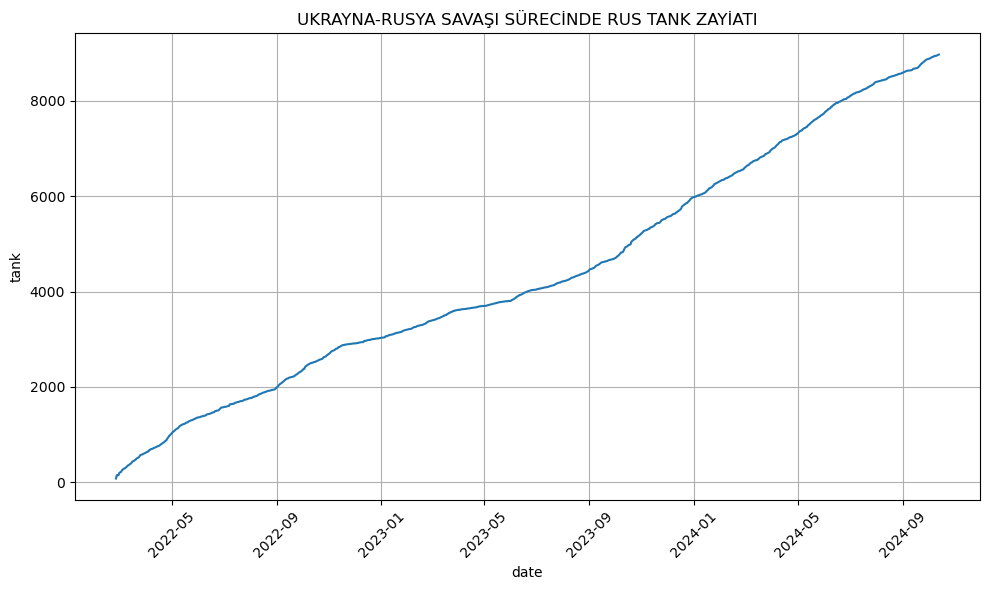

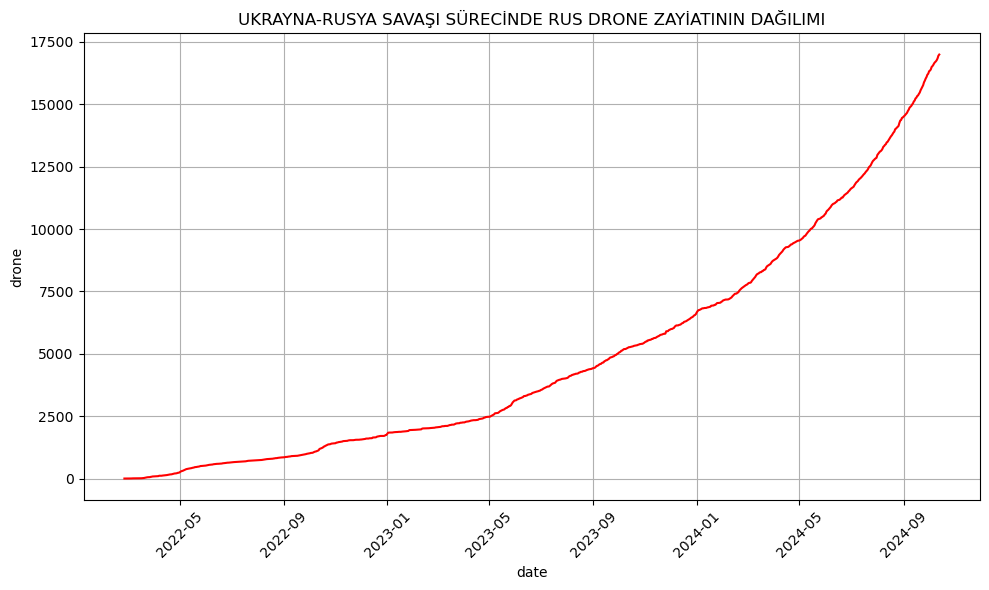

In [94]:
#Tank Kayıplarını Zaman İçerisinde İnceleme

import matplotlib.pyplot as plt

#Veri tipini convert edelim
df_eq['date']=pd.to_datetime(df_eq['date'])

#Grafiği çizelim
plt.figure(figsize=(10,6))
plt.plot(df_eq['date'],df_eq['tank'])
plt.title('UKRAYNA-RUSYA SAVAŞI SÜRECİNDE RUS TANK ZAYİATI')
plt.xlabel('date')
plt.ylabel('tank')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#Rus Tarafının Yaşadığı Drone Kayıplarını İnceleyelim
plt.figure(figsize=(10,6))
plt.plot(df_eq['date'],df_eq['drone'],color='red')
plt.title('UKRAYNA-RUSYA SAVAŞI SÜRECİNDE RUS DRONE ZAYİATININ DAĞILIMI')
plt.xlabel('date')
plt.ylabel('drone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Yukarıdaki grafikler Rusya-Ukrayna savaşı sürecinde Rusya'nın drone ve tank kayıplarının zaman içerisindeki değişimini gösteren grafiklerdir.

1)Drone Kayıpları:
2022 Mayıs ayından 2024 Ekim ayına kadar Rusya'nın drone kayıplarını göstermektedir.Özellikle 2023 yılının Eylül ayınan itibaren drone kayıplarında ki ivmenin hızlı bir ivme göstererek arttığını görmekteyiz.2023 yıl sonuna doğru bu kayıplar 17.000 üzerine çıkmaktadır.Bu rakam bizlere Drone teknolojisinin savaşlarda ne denli kullanıldığını ve bu sistemlerin kara hava savunma sistemlerince ne derece hedef alındığını bizlere gösterir.Artan Rus drone kayıpları ise savaşın süresi uzadıkça Ukrayna Devleti'nin hava savunma kabiliyetlerinin özellikle drone'a karşı savunma kabiliyetlerinin arttığını göstermektedir.

2)Tank Kayıpları:
Tank kayıplarında ki artışın Drone ile karşılaştırıldığı zaman daha düzenli bir artış seyrettiğini görürüz.Düzenli artış ile 8.000 üzerine çıkmıştır.Tank kayıplarında ki bu düzenli artış Rus Silahlı Kuvvetleri'nin kara muhaberelerinde tanklara önem verdiği ve zaman içerisinde de ciddi bir güç zayıflaması yaşadığını göstermektedir.Ayrıca verilere baktığımız zaman Ukrayna'nın anti-tank sistemlerinde gelişme olduğu yorumunu yapabiliriz.

In [96]:
#Korelasyon Analizi
# Calculate the correlation between different categories in the dataset
korelasyon_matriksi = df_eq[['tank', 'drone', 'helicopter', 'APC', 'MRL']].corr()

#Yazdıralım
korelasyon_matriksi

,tank,drone,helicopter,APC,MRL
tank,1.000000,0.966123,0.837948,0.998653,0.989243
drone,0.966123,1.000000,0.692925,0.975476,0.936324
helicopter,0.837948,0.692925,1.000000,0.819426,0.870928
APC,0.998653,0.975476,0.819426,1.000000,0.982385
MRL,0.989243,0.936324,0.870928,0.982385,1.000000


Yukarıdaki korelasyon verilerine baktığımızda tank ve zpt(zırhlı personel taşıyıcı) arasında yüksek bir korelasyon bulunmaktadır.Bu da iki tip aracın beraber kullanımını gösterir olup.Tanklar cephe hattında saldırılara eşlik ederken zpt'lerin personeli bu cephelere taşıdığı yorumunu yapabilirz.Bu iki aracın aynı dönemlerdeki yoğun kayıpları bizlere kara savaşlarının hangi dönemlerde arttığını gösterir.

In [10]:

df_combined = pd.merge(df_eq, df[['date', 'personnel']], on='date')

df_combined['personnel'] = pd.to_numeric(df_combined['personnel'], errors='coerce')

df_combined_clean = df_combined.dropna(subset=['personnel', 'tank', 'APC', 'drone', 'helicopter'])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_combined_clean[['tank', 'APC', 'drone', 'helicopter']]
y = df_combined_clean['personnel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

r_squared, model.coef_


(0.9939780682225187,
 array([149.89907998, -67.73858965,  30.36994968,   4.90490814]))

R^2 değeri personel kayıplarını açıklamak için yüksek bir değerdir.Model personel kayıplarını ekipman kayıplarıyla açıklayabilir

1-Tank kayıpları arttıkça personel kaybı artıyor
2-Personel kayıplarını azaltıyor negatif ilişki var
3-Drone kayıpları personel kayıpları üzerinde hafif bir pozitif etkide bulunuyor
4-Helikopter ve Personel kaybı arasında nispeten düşük bir ilişk var

En çok personel kaybı sebebinin Tank sebebiyle olduğu Personel taşıyıcılarda ki negatif değerin Zpt'lerin personel korumasında ne denli önemli olduğunu gösteriyor.